# **AUTOLIB ELECTRIC CAR-SHARING SERVICE COMPANY ANALYSIS**

# 1. INTRODUCTION

# Defining the question

The research problem is to investigate electric car usage (blue cars) during weekdays based on the Autolib dataset provided

The test hypothesis in this context is to check whether there is a difference in the means of blue cars picked from two different postal codes during the weekdays

Null hypothesis: The number of Bluecars taken from postal code 75015 is the same as the number of cars taken from in postal code 75017 during weekdays

(μ1=μ2)

Alternative hypothesis: The number of Bluecars taken from postal code 75015 is the not the same as the number of cars taken from in postal code 75017 during weekdays

(μ1≠μ2)

Level of confidence = 95%

Significance level = 5%

# Defining the Metric for success

This study will be considered successful if the null hypothesis is True.

Therefore, to address the above question, these are the objectives I will use:

Data cleaning using Python

Univariate and Bivariate visualizations and analysis

Hypothesis testing

Sampling

# Understanding the context

We have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made

# Data Relevance

The dataset and glossary to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset] and http://bit.ly/DSCoreAutolibDatasetGlossary

The dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging)

# 2. READING THE DATASET

# Importing our Libraries

In [ ]:
#To avoid printing out warnings
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# importing the Libraries we will need
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import math

from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests
%matplotlib inline

# Loading the dataset

In [ ]:
# Loading our dataset
# create a dataframe to better view the data
# 
autolib_df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')


# Understanding our dataset

Checking the data


 

In [ ]:
#preview the top of our dataset
autolib_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#preview the bottom of the dataset
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#Checking whether each column has appropriate datatype
autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
#Checking the dataset information
autolib_df.info

<bound method DataFrame.info of        Postal code       date  n_daily_data_points  dayOfWeek day_type  \
0            75001   1/1/2018                 1440          0  weekday   
1            75001   1/2/2018                 1438          1  weekday   
2            75001   1/3/2018                 1439          2  weekday   
3            75001   1/4/2018                 1320          3  weekday   
4            75001   1/5/2018                 1440          4  weekday   
...            ...        ...                  ...        ...      ...   
16080        95880  6/15/2018                 1440          4  weekday   
16081        95880  6/16/2018                 1440          5  weekend   
16082        95880  6/17/2018                 1440          6  weekend   
16083        95880  6/18/2018                 1440          0  weekday   
16084        95880  6/19/2018                 1370          1  weekday   

       BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
0        

In [ ]:
#Checking the numeric features of the dataset
autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
#Checking the shape of the dataset(rows and columns)
print('This dataset has ' + str(autolib_df.shape[0]) + ' rows and ' +  str(autolib_df.shape[1]) + ' columns' )

This dataset has 16085 rows and 13 columns


In [ ]:
#checking the columns
autolib_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

# Since our hypothesis is majorly for weekdays, we will filter out data to have data that concerns weekdays only

In [ ]:
# Acessing the data for weekdays only
# 
autolib_df = autolib_df[autolib_df['day_type'] == 'weekday']
# 
autolib_df.shape



(11544, 13)

We observe less rows compared to the original dataset which had 16085

# Data Cleaning

In [ ]:
# Removing spaces from the dataset
autolib_df .columns = autolib_df.columns.str.strip().str.lower().str.replace('_','').str.replace('.','').str.replace(' ','')
autolib_df .head()

,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,utilibtakensum,utilibreturnedsum,utilib14takensum,utilib14returnedsum,slotsfreedsum,slotstakensum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Missing Values

In [ ]:
# checking for null values
autolib_df .isnull().sum()


postalcode             0
date                   0
ndailydatapoints       0
dayofweek              0
daytype                0
bluecarstakensum       0
bluecarsreturnedsum    0
utilibtakensum         0
utilibreturnedsum      0
utilib14takensum       0
utilib14returnedsum    0
slotsfreedsum          0
slotstakensum          0
dtype: int64

The output reveals that there are no missig values hence the data is good for our analysis.

# Handling Messy columns

In [ ]:
## Since were only concerned with the bluecars only, we delete the columns that we dont read
autolib_df.drop(['utilibtakensum', 'utilibreturnedsum', 'utilib14takensum','utilib14returnedsum'], axis = 1, inplace = True)

# previewing formation after deleting accounts
autolib_df.head()

,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,slotsfreedsum,slotstakensum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


# Outliers

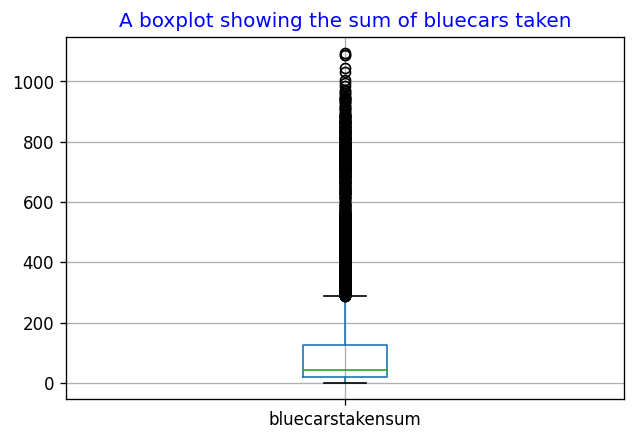

In [ ]:
#Checking for outliers on the bluecarstakensum
# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 120)
autolib_df.boxplot(['bluecarstakensum'])
plt.title("A boxplot showing the sum of bluecars taken", color = 'blue')
plt.show()

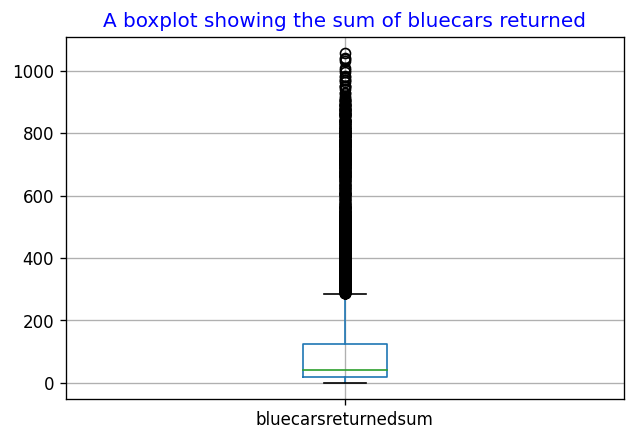

In [ ]:
#Checking for outliers on the bluecarsreturnedsum
# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 120)
autolib_df.boxplot(['bluecarsreturnedsum'])
plt.title("A boxplot showing the sum of bluecars returned", color = 'blue')
plt.show()

In [ ]:
# checking that there are no anomalies in the column

autolib_df.nunique()

postalcode             104
date                   112
ndailydatapoints        20
dayofweek                5
daytype                  1
bluecarstakensum       789
bluecarsreturnedsum    781
slotsfreedsum          261
slotstakensum          263
dtype: int64

# DESCRIPTIVE ANALYSIS

# Measures of Central Tendency

Here we shall conduct measures of Central tendancy for both bluecarstakensum and bluecarsreturnedsum

Mean

In [ ]:
# Compute the mean of the bluecarstakensum

autolib_df.bluecarstakensum.mean()

116.0286729036729

In [ ]:
# Compute the mean of the bluecarsreturnedsum

autolib_df.bluecarsreturnedsum.mean()

115.63937976437977

Median

In [ ]:
# Compute the median of the bluecarstakensum

autolib_df.bluecarstakensum.median()

42.0

In [ ]:
# Compute the median of the bluecarsreturnedsum

autolib_df.bluecarsreturnedsum.median()

42.0

Mode

In [ ]:
# Compute the mode of the bluecarstakensum

autolib_df.bluecarstakensum.mode()

0    12
dtype: int64

In [ ]:
# Compute the mode of the bluecarsreturnedsum

autolib_df.bluecarsreturnedsum.mode()

0    12
dtype: int64

# Measures of Dispersion/Variability/Spread

Standard Deviation, Variance, Kurtosis and Skewness

In [ ]:
# Sum of Bluecars taken
print("The Standard Deviation: ",autolib_df.bluecarstakensum.std())
print("The Variance: ",autolib_df.bluecarstakensum.var())
print("The Kurtosis: ",autolib_df.bluecarstakensum.kurt())
print("The Skewness: ",autolib_df.bluecarstakensum.skew())
# 


The Standard Deviation:  169.62690469970084
The Variance:  28773.286798001394
The Kurtosis:  5.553808116768028
The Skewness:  2.3281979815185876


It is clear that the kurtosis is greater than 3 which means that the data has heavier tails than a normal distribution

In [ ]:
# Sum of Bluecars returned
print("The Standard Deviation: ",autolib_df.bluecarsreturnedsum.std())
print("The Variance: ",autolib_df.bluecarsreturnedsum.var())
print("The Kurtosis: ",autolib_df.bluecarsreturnedsum.kurt())
print("The Skewness: ",autolib_df.bluecarsreturnedsum.skew())
# 


The Standard Deviation:  168.34475125432746
The Variance:  28339.955274881388
The Kurtosis:  5.5428632223425325
The Skewness:  2.3289726516394973


This also displays that the kurtosis is greater than 3 which means that the data has heavier tails than a normal distribution

# 3. UNIVARIATE ANALAYSIS

In [ ]:
# Converting the day of week from from numericals to strings for plotting
# Using the mapping function
#
autolib_df['dayofweek'] = autolib_df.dayofweek.map({0: 'Monday', 1: 
                                          'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})
# Confirming that our dataset day_type columns was successfully converted
autolib_df.head()
# clearly seen that the days have been coverted

,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,slotsfreedsum,slotstakensum
0,75001,1/1/2018,1440,Monday,weekday,110,103,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,18,20


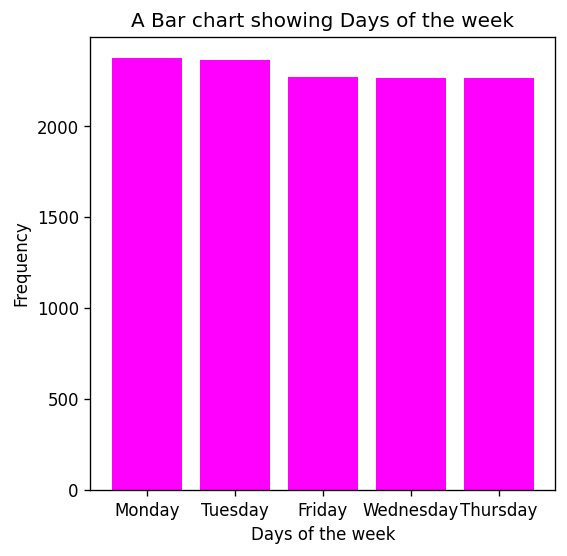

In [ ]:
# Plotting a bar plot of the day of week categories 
# using a copy of the dataset
# df = autolib_iqr
# 
day = autolib_df.dayofweek.value_counts()
day
# accessing the data to plot
# labels
sizes= day.index
sizes

# values
data = day.values
data

plt.figure(figsize = (5,5), dpi = 120)
plt.bar(sizes, data, color = 'magenta')
plt.ylabel("Frequency")
plt.xlabel('Days of the week')
plt.title("A Bar chart showing Days of the week", color = 'black')
plt.show()


The output displays that Monday and tuesday are top in business and decrease as the week goes on

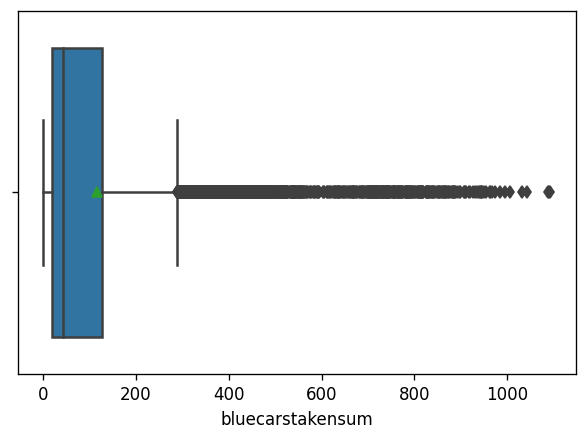

In [ ]:
# Visualize the bluecarstakensum 
# 
plt.figure(dpi = 120)
sns.boxplot(autolib_df['bluecarstakensum'],showmeans = True)
# 


The boxplot displays a couple of outliers in the dataset, which we use  Inter Quartile Range(IQR) method to confirm

In [ ]:
# checking for outliers using the IQR range
# 
Q1 = autolib_df.bluecarstakensum.quantile(0.25)
Q3 = autolib_df.bluecarstakensum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib_df.bluecarstakensum < Q1 - 1.5 * IQR) | (autolib_df.bluecarstakensum > Q3 + 1.5 * IQR))
outliers.value_counts()


False    9958
True     1586
Name: bluecarstakensum, dtype: int64

We observe that there are 1586 outliers but we choose not to delete the outliers because it would result in an inconclusive outcome if the outliers are actually removed since they can actually be viable entries

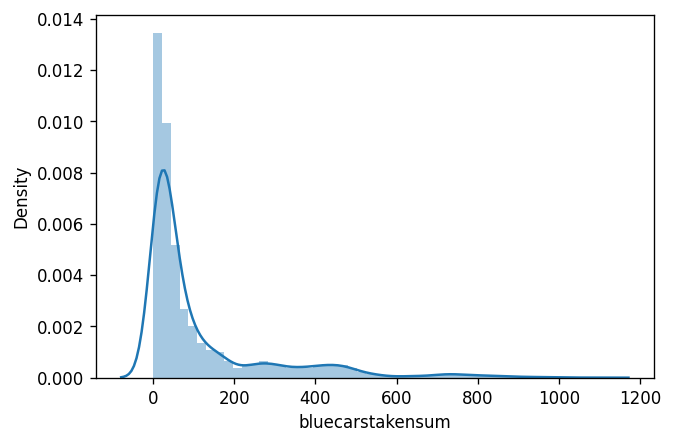

In [ ]:
# Plotting a histogram to view te total sum of cars taken
# 

plt.figure(dpi = 120)
sns.distplot(autolib_df.bluecarstakensum, kde = True)


We see that te curve is not nromally distributed but it is skewed to the right side of the curve. In this case, most data is concentrated towards the tail side

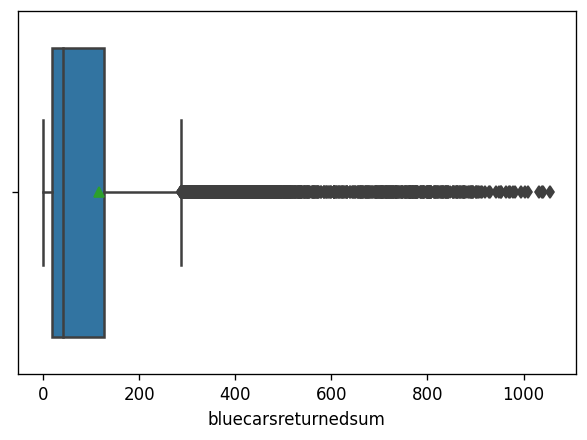

In [ ]:
# We also visualize the blue cars returned sum column
# 

plt.figure(dpi = 120)
sns.boxplot(autolib_df['bluecarsreturnedsum'],showmeans = True)

It displays that there are outliers which we use IQR to confirm

In [ ]:
# performing the inter quartlie range to check for outliers
# 
Q1 = autolib_df.bluecarsreturnedsum.quantile(0.25)
Q3 = autolib_df.bluecarsreturnedsum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib_df.bluecarsreturnedsum < Q1 - 1.5 * IQR) | (autolib_df.bluecarsreturnedsum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    9952
True     1592
Name: bluecarsreturnedsum, dtype: int64

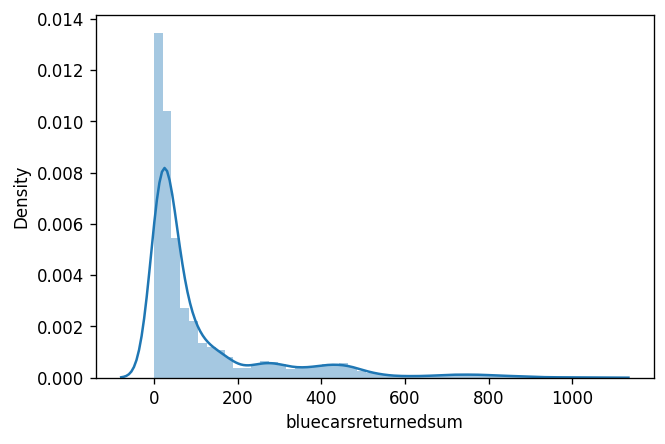

In [ ]:
# Historgram on the sum of blue cars returned
# 

plt.figure(dpi = 120)
sns.distplot(autolib_df.bluecarsreturnedsum, kde = True)

The output for the sum of bluecars returned shows that data is not normally distributed and hence it has a right tail where data is more concentrated as you move 
to the right side of the tail

# Recommendations based on the Univariate Analysis

The taken_sum columns and the returned_sum columns seem to be very similar.

The Kurtosis of the numerical data columns show that the distribution of the data is heavy-tailed and in most cases, is not normally distributed.

Outliers are viable entries and should not be dropped.

# BIVARIATE ANALYSIS

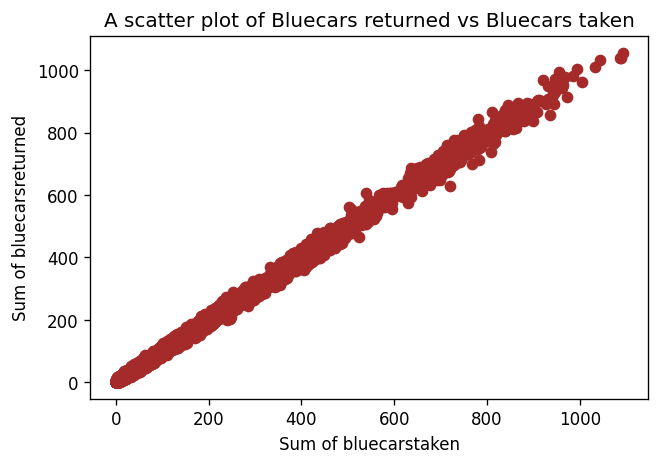

In [ ]:
# Here we plot a scatterplot to visualize the 2 numerical variables

plt.figure(dpi = 120)
plt.scatter(autolib_df['bluecarstakensum'], autolib_df['bluecarsreturnedsum'], color = 'brown')
plt.title('A scatter plot of Bluecars returned vs Bluecars taken', color = 'black')
plt.xlabel('Sum of bluecarstaken')
plt.ylabel('Sum of bluecarsreturned')
plt.show()
# 


From the plot, we can see that there is a high linear colinearity between the sum of the bluecars taken and the bluecars returned.

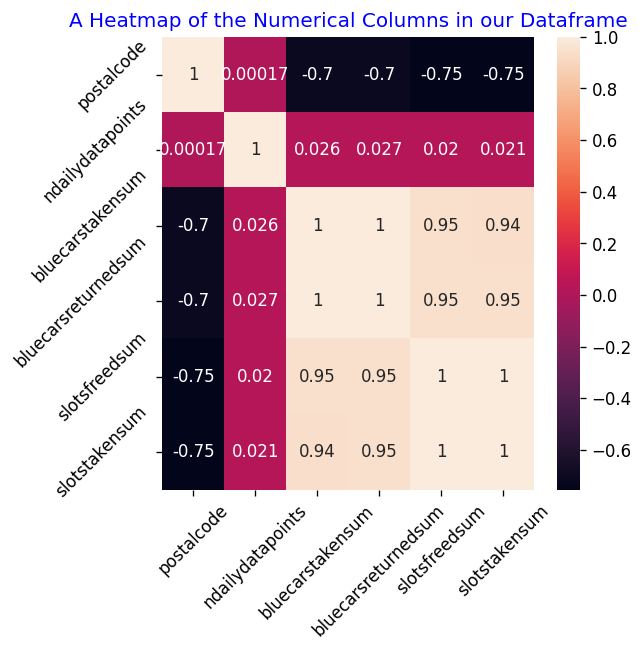

In [ ]:
# defining our data

x = autolib_df.corr()
# specify the figure size

plt.figure(figsize = (5,5), dpi = 120)
# using the Seaborn library
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)

# Rotating our x and y axis ticks

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

# labelling the title

plt.title('A Heatmap of the Numerical Columns in our Dataframe', color = "blue")

# displaying our chart

plt.show()
  

There is a high correlation between the numerical variables in the dataset

# 4. TEST STATISTICS


Hypothesis testing (using a z-score).

A sample of 1000 values from each postal area has been used. A 95% confidence level has also been used to test the hypothesis.

Null Hypothesis: The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays

μ1=μ2

Alternative Hypothesis: The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekdays

μ1≠μ2


# 5. Sampling

I chose to use Simple Random Sampling.

This is because Simple Random sampling are the best method of selecting your sample from the population of interest.

The advantages are that your sample represents the target population and eliminates sampling biasness.

In [ ]:
# Taking a sample from the autolib dataset through Simple Random Sampling;
# 
autolib_df_sample = autolib_df.sample(n=1000,replace='False')
print(autolib_df_sample)

       postalcode       date  ndailydatapoints  dayofweek  daytype  \
11840       93370   2/8/2018              1438   Thursday  weekday   
9834        92800  1/24/2018              1434  Wednesday  weekday   
15060       94450  3/12/2018              1440     Monday  weekday   
10308       93130  1/30/2018              1440    Tuesday  weekday   
9619        92600   5/4/2018              1435     Friday  weekday   
...           ...        ...               ...        ...      ...   
6882        92260  1/22/2018              1440     Monday  weekday   
12112       93400  3/21/2018              1440  Wednesday  weekday   
10186       93110   3/8/2018              1439   Thursday  weekday   
6903        92260  2/12/2018              1440     Monday  weekday   
730         75005  4/20/2018              1417     Friday  weekday   

       bluecarstakensum  bluecarsreturnedsum  slotsfreedsum  slotstakensum  
11840                 0                    1              0              0  
9834 

In [ ]:
# To understand the mean of the blue cars from our sample,
print(autolib_df_sample.bluecarstakensum.mean())
# 

117.38


There is a change in the mean compared to the previous mean of the whole dataset which was 116.0286729036729

In [ ]:
# getting the standard deviation of the blue cars taken sum
# 
autolib_df_sample.bluecarstakensum.std()

169.4034684861414

In [ ]:
# Getting data from our desired postal codes, starting with 75015
# 
df_75015 =autolib_df_sample[(autolib_df_sample.postalcode == 75015)]
df_75015.head()

,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,slotsfreedsum,slotstakensum
2241,75015,3/2/2018,1440,Friday,weekday,897,860,253,255
2239,75015,2/28/2018,1429,Wednesday,weekday,723,696,182,185
2254,75015,3/15/2018,1440,Thursday,weekday,818,770,248,231
2289,75015,4/19/2018,1203,Thursday,weekday,712,736,183,181
2326,75015,6/6/2018,1440,Wednesday,weekday,1032,1010,264,262


In [ ]:
# Getting data from our desired postal codes, starting with 75017
# 
df_75017 = autolib_df_sample[(autolib_df_sample.postalcode == 75017)]
df_75017.head()

,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,slotsfreedsum,slotstakensum
2636,75017,6/4/2018,1440,Monday,weekday,707,707,163,161
2558,75017,3/7/2018,1440,Wednesday,weekday,741,733,196,200
2511,75017,1/16/2018,1440,Tuesday,weekday,702,676,163,159
2637,75017,6/5/2018,1439,Tuesday,weekday,744,712,217,204
2644,75017,6/12/2018,1439,Tuesday,weekday,755,763,212,213


Mean of the population (sum of bluecarstaken) is 116.028

Mean of the sample (bluecarstakensum) is 117.38

Sample size is 1000

Standard devaition of the sample is 169.4034

Confidence interval is 95%

Using Z-score to get P-value

In [ ]:
# calculating z_score to get p_value
from scipy import stats 
# 
sample_size = 1000
pop_mean = 116.028
sample_mean = 117.38
# zscore = (sample_mean - pop_mean) 
z_score = (117.38 - 116.028) / (169.4034 / (math.sqrt(1000)))
z_score

0.25237978674262834

In [ ]:
import scipy.stats
scipy.stats.norm.sf(abs(0.25237978674262834))*2 #since it is a two-tailed test where
#we compare if the sample mean is greater or less than the population mean

0.800747522408216

z_score = 0.25

p_value = 0.80

level of significance = 0.05

p_value > 0.05

From the analysis, we see that the p_value is greater than 0.05 which means there is not enough evidence to reject the null hypothesis, hence we fail to reject the Null hypothesis

Therefore, we keep the claim that the number of Bluecars taken from the postal code 75015 is the same as the number of cars taken from the postal code 75017 during weekdays

Attached is the link to my Hypothesis testing report

https://drive.google.com/drive/folders/1i8RY98hIR9aB6m2fYROz3msrVqnDb1j0?usp=sharing